<a href="https://colab.research.google.com/github/WataruMiyabayashi/-Pferderennen/blob/main/AI_Quest2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> インデントされたブロック



欠損値補間してlightgbm＋one_hot


In [64]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np

trainデータを読み込む

In [65]:
sample = pd.read_csv('train.csv')

In [66]:
print(sample.shape)

(55583, 29)


In [67]:
#実際のデータ型
print(sample.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      55583 non-null  int64  
 1   accommodates            55583 non-null  int64  
 2   amenities               55583 non-null  object 
 3   bathrooms               55436 non-null  float64
 4   bed_type                55583 non-null  object 
 5   bedrooms                55512 non-null  float64
 6   beds                    55487 non-null  float64
 7   cancellation_policy     55583 non-null  object 
 8   city                    55583 non-null  object 
 9   cleaning_fee            55583 non-null  object 
 10  description             55583 non-null  object 
 11  first_review            43675 non-null  object 
 12  host_has_profile_pic    55435 non-null  object 
 13  host_identity_verified  55435 non-null  object 
 14  host_response_rate      41879 non-null

欠損値削除

In [68]:
sample = sample.dropna(subset=['beds'])
sample = sample.dropna(subset=['bedrooms'])
sample = sample.dropna(subset=['bathrooms'])
sample=sample.dropna(subset=['host_identity_verified'])
sample=sample.dropna(subset=['host_has_profile_pic'])
sample=sample.dropna(subset=['host_since'])
sample=sample.dropna(subset=['zipcode'])

欠損値の補完　平均値の算出

In [69]:
mode_val_host = sample['first_review'].mode().iloc[0]
sample['first_review'] = sample['first_review'].fillna(mode_val_host)

In [70]:
mode_val_host= sample['host_response_rate'].mode().iloc[0]
sample['host_response_rate'] = sample['host_response_rate'].fillna(mode_val_host)

In [71]:
mode_val_last = sample['last_review'].mode().iloc[0]
sample['last_review'] = sample['last_review'].fillna(mode_val_last)

In [72]:
mode_val_neighbour = sample['neighbourhood'].mode().iloc[0]
sample['neighbourhood'] = sample['neighbourhood'].fillna(mode_val_neighbour)

In [73]:
mean_val_scores = sample['review_scores_rating'].mean()
sample['review_scores_rating'] = sample['review_scores_rating'].fillna(mean_val_scores)

In [74]:
mode_val_thumbnail = sample['thumbnail_url'].mode().iloc[0]
sample['thumbnail_url'] = sample['thumbnail_url'].fillna(mode_val_thumbnail)

In [75]:
y = sample['y']

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27850 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20385 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 23487 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27850 missing from current font.
  font.set_te

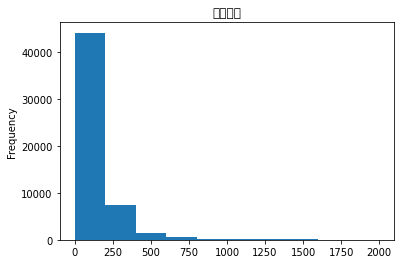

In [76]:
# ヒストグラムの可視化
y.plot.hist(title="宿泊価格")

外れ値の削除

In [77]:
sample = sample[sample['y']>=10]

In [78]:
import seaborn as sns

カラム選択

In [79]:
select_columns = ['accommodates','room_type','bed_type','bathrooms','bedrooms','beds','review_scores_rating','number_of_reviews','cleaning_fee']

In [80]:
print(sample[select_columns])

       accommodates        room_type  ... number_of_reviews  cleaning_fee
0                 6     Private room  ...                 1             t
1                 2     Private room  ...                 9             t
3                 2     Private room  ...                38             t
4                 2  Entire home/apt  ...                 5             t
5                 2     Private room  ...                 7             t
...             ...              ...  ...               ...           ...
55578             4  Entire home/apt  ...               110             t
55579             2     Private room  ...                 6             f
55580             2     Private room  ...                14             t
55581             1     Private room  ...                10             t
55582             1     Private room  ...                 0             f

[54470 rows x 9 columns]


In [81]:
def change_tf(x):
    if x=='t':
        return 1
    elif x=='f':
        return 0

In [82]:
sample['cleaning_fee'] = sample['cleaning_fee'].apply(change_tf)

In [83]:
sample['host_identity_verified'] = sample['host_identity_verified'].apply(change_tf)

In [84]:
sample['instant_bookable'] = sample['instant_bookable'].apply(change_tf)

ダミー変数化

In [85]:
select_columns =['accommodates','room_type','bed_type','bathrooms','bedrooms','beds','review_scores_rating','number_of_reviews','cleaning_fee']

In [23]:
data_entire = sample[sample['room_type'] == 'Entire home/apt']
data_private = sample[sample['room_type'] == 'Private room']
data_share = sample[sample['room_type'] == 'Shared room']


In [24]:
dummy_data_entire = pd.get_dummies(data_entire[select_columns], drop_first=True)
dummy_data_private = pd.get_dummies(data_private[select_columns],drop_first=True)
dummy_data_share = pd.get_dummies(data_share[select_columns], drop_first=True)

In [ ]:
dummy_data = pd.get_dummies(sample[select_columns], drop_first=True)

ダミー変数化　label

In [87]:
pip install category_encoders

     |████████████████████████████████| 80 kB 4.5 MB/s 


In [88]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [106]:

ce_oe = ce.OrdinalEncoder(cols=select_columns,handle_unknown='impute')

In [107]:
dummy_data = ce_oe.fit_transform(sample)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [108]:
for i in select_columns:
    dummy_data[i] = dummy_data[i] - 1

In [109]:
dummy_data=dummy_data[select_columns]

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test,y_train,y_test = train_test_split(dummy_data, sample['y'], random_state = 1234,test_size=0.25)

lightgbm

In [112]:
import matplotlib.pyplot as plt
import lightgbm as lgb

In [113]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)

In [114]:
params = {'metric': 'rmse',
          'max_depth' : 12}

In [115]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=10000,
                early_stopping_rounds=100,
                verbose_eval=50)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 128.908
[100]	valid_0's rmse: 129.323
Early stopping, best iteration is:
[44]	valid_0's rmse: 128.853


In [101]:
print(dummy_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54470 entries, 0 to 55582
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   accommodates          54470 non-null  int64
 1   room_type             54470 non-null  int64
 2   bed_type              54470 non-null  int64
 3   bathrooms             54470 non-null  int64
 4   bedrooms              54470 non-null  int64
 5   beds                  54470 non-null  int64
 6   review_scores_rating  54470 non-null  int64
 7   number_of_reviews     54470 non-null  int64
 8   cleaning_fee          54470 non-null  int64
dtypes: int64(9)
memory usage: 4.2 MB
None


In [116]:
predicted = gbm.predict(X_test)

In [117]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
#予測値と正解値を描写する関数
def True_Pred_map(pred_df):
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    R2 = r2_score(pred_df['true'], pred_df['pred']) 
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('true', 'pred', data=pred_df)
    ax.set_xlabel('True Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R^2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)

In [118]:
pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
pred_df.columns = ['true', 'pred']

In [119]:
pred_df.head()

,true,pred
0,90.0,143.858681
1,89.0,130.714056
2,300.0,111.692405
3,80.0,78.666314
4,130.0,152.500325


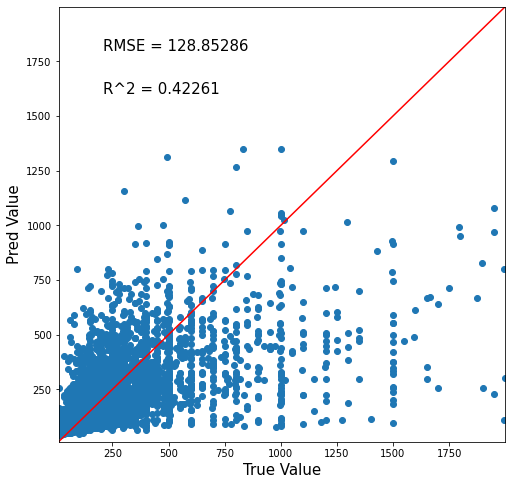

In [120]:
True_Pred_map(pred_df)

max_depthの取る値を変化させてRmseとの関係を可視化してみる

In [121]:
RMSE_list = []
count = []
for i in range(1, 15):
    params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth' : i}
    
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10000,
                valid_sets=lgb_eval,
                early_stopping_rounds=100,
                verbose_eval=50)
    
    predicted = gbm.predict(X_test)
    pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
    pred_df.columns = ['true', 'pred']
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    RMSE_list.append(RMSE)
    count.append(i)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 142.096
[100]	valid_0's rmse: 138.437
[150]	valid_0's rmse: 136.769
[200]	valid_0's rmse: 135.783
[250]	valid_0's rmse: 135.174
[300]	valid_0's rmse: 134.786
[350]	valid_0's rmse: 134.533
[400]	valid_0's rmse: 134.347
[450]	valid_0's rmse: 134.191
[500]	valid_0's rmse: 134.065
[550]	valid_0's rmse: 133.94
[600]	valid_0's rmse: 133.848
[650]	valid_0's rmse: 133.767
[700]	valid_0's rmse: 133.681
[750]	valid_0's rmse: 133.62
[800]	valid_0's rmse: 133.556
[850]	valid_0's rmse: 133.5
[900]	valid_0's rmse: 133.458
[950]	valid_0's rmse: 133.407
[1000]	valid_0's rmse: 133.365
[1050]	valid_0's rmse: 133.318
[1100]	valid_0's rmse: 133.28
[1150]	valid_0's rmse: 133.248
[1200]	valid_0's rmse: 133.213
[1250]	valid_0's rmse: 133.178
[1300]	valid_0's rmse: 133.133
[1350]	valid_0's rmse: 133.106
[1400]	valid_0's rmse: 133.068
[1450]	valid_0's rmse: 133.028
[1500]	valid_0's rmse: 132.987
[1550]	valid_0's rmse: 132.958
[

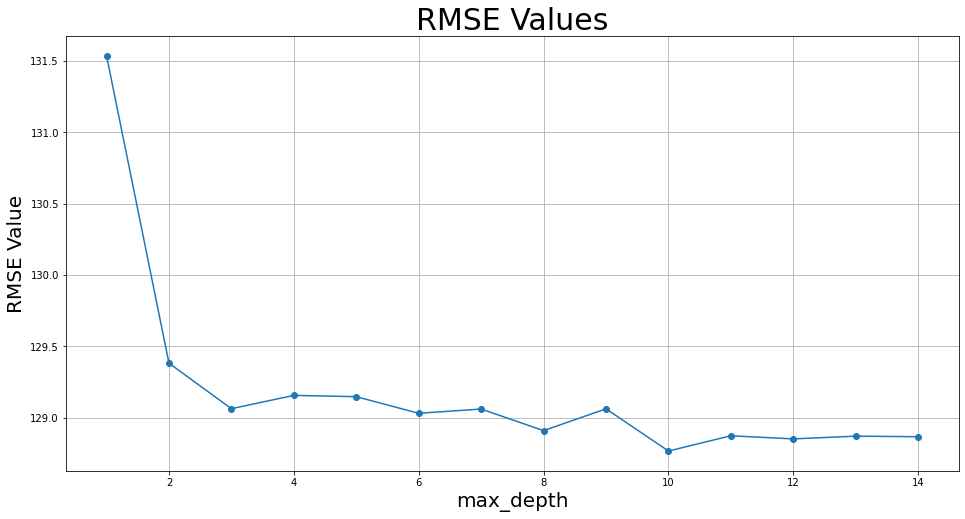

In [122]:
plt.figure(figsize=(16,8))
plt.plot(count, RMSE_list, marker="o")
plt.title("RMSE Values", fontsize=30)
plt.xlabel("max_depth", fontsize=20)
plt.ylabel("RMSE Value", fontsize=20)
plt.grid(True)

In [123]:
params = {'metric': 'rmse',
          'max_depth' : 10}

In [124]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=10000,
                early_stopping_rounds=100,
                verbose_eval=50)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 128.878
[100]	valid_0's rmse: 129.165
Early stopping, best iteration is:
[41]	valid_0's rmse: 128.768


testデータの読み込み

In [42]:
mydata = pd.read_csv("test.csv")

In [43]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18528 entries, 0 to 18527
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18528 non-null  int64  
 1   accommodates            18528 non-null  int64  
 2   amenities               18528 non-null  object 
 3   bathrooms               18475 non-null  float64
 4   bed_type                18528 non-null  object 
 5   bedrooms                18508 non-null  float64
 6   beds                    18493 non-null  float64
 7   cancellation_policy     18528 non-null  object 
 8   city                    18528 non-null  object 
 9   cleaning_fee            18528 non-null  object 
 10  description             18528 non-null  object 
 11  first_review            14572 non-null  object 
 12  host_has_profile_pic    18488 non-null  object 
 13  host_identity_verified  18488 non-null  object 
 14  host_response_rate      13933 non-null

In [44]:
print(mydata.isnull().sum())

id                           0
accommodates                 0
amenities                    0
bathrooms                   53
bed_type                     0
bedrooms                    20
beds                        35
cancellation_policy          0
city                         0
cleaning_fee                 0
description                  0
first_review              3956
host_has_profile_pic        40
host_identity_verified      40
host_response_rate        4595
host_since                  40
instant_bookable             0
last_review               3947
latitude                     0
longitude                    0
name                         0
neighbourhood             1712
number_of_reviews            0
property_type                0
review_scores_rating      4166
room_type                    0
thumbnail_url             2071
zipcode                    250
dtype: int64


欠損値の補間

In [45]:
mode_val_pic2 = mydata['host_has_profile_pic'].mode().iloc[0]
mydata['host_has_profile_pic'] = mydata['host_has_profile_pic'].fillna(mode_val_pic2)

In [46]:
mode_val_identity2 = mydata['host_identity_verified'].mode().iloc[0]
mydata['host_identity_verified'] = mydata['host_identity_verified'].fillna(mode_val_identity2)

In [47]:
mode_val_since2 = mydata['host_since'].mode().iloc[0]
mydata['host_since'] = mydata['host_since'].fillna(mode_val_since2)

In [48]:
mode_val_zipcode2 = mydata['zipcode'].mode().iloc[0]
mydata['zipcode'] = mydata['zipcode'].fillna(mode_val_zipcode2)

In [49]:
mean_val_bath2 = mydata['bathrooms'].mean()
mydata['bathrooms'] = mydata['bathrooms'].fillna(mean_val_bath2)

In [50]:
mean_val_bedrooms2 = mydata['bedrooms'].mean()
mydata['bedrooms'] = mydata['bedrooms'].fillna(mean_val_bedrooms2)

In [51]:
mean_val_beds2 = mydata['beds'].mean()
mydata['beds'] = mydata['beds'].fillna(mean_val_beds2)

In [52]:
mode_val_host2 = mydata['host_response_rate'].mode().iloc[0]
mydata['host_response_rate'] = mydata['host_response_rate'].fillna(mode_val_host2)

In [53]:
mode_val_last2 = mydata['last_review'].mode().iloc[0]
mydata['last_review'] = mydata['last_review'].fillna(mode_val_last2)

In [54]:
mode_val_neighbour2 = mydata['neighbourhood'].mode().iloc[0]
mydata['neighbourhood'] = mydata['neighbourhood'].fillna(mode_val_neighbour2)

In [55]:
mode_val_first2 = mydata['first_review'].mode().iloc[0]
mydata['first_review'] = mydata['first_review'].fillna(mode_val_first2)

In [56]:
mean_val_scores2 = mydata['review_scores_rating'].mean()
mydata['review_scores_rating'] = mydata['review_scores_rating'].fillna(mean_val_scores2)

In [57]:
mode_val_thumbnail2 = mydata['thumbnail_url'].mode().iloc[0]
mydata['thumbnail_url'] = mydata['thumbnail_url'].fillna(mode_val_thumbnail2)

In [58]:
def change_tf(x):
    if x=='t':
        return 1
    elif x=='f':
        return 0

mydata['cleaning_fee'] = mydata['cleaning_fee'].apply(change_tf)

In [59]:
select_columns =['accommodates','room_type','bed_type','bathrooms','bedrooms','beds','review_scores_rating','number_of_reviews','cleaning_fee']

In [60]:
dummy_data2 = pd.get_dummies(mydata[select_columns], drop_first=True)

In [61]:
y_pred_Unknown = gbm.predict(dummy_data2)

In [62]:
mydata['ab']= y_pred_Unknown

In [63]:
mydata[['id', 'ab']].to_csv('./submit_2021_1.csv', header=False, index=False)

lightgbm＋onehot＋欠損値補間なし

In [126]:
sample = pd.read_csv('train.csv')

In [127]:
y = sample['y']

In [128]:
sample = sample[sample['y']>=10]

In [129]:
select_columns = ['accommodates','room_type','bed_type','bathrooms','bedrooms','beds','review_scores_rating','number_of_reviews','cleaning_fee']

In [130]:
def change_tf(x):
    if x=='t':
        return 1
    elif x=='f':
        return 0

In [131]:
sample['cleaning_fee'] = sample['cleaning_fee'].apply(change_tf)
sample['host_identity_verified'] = sample['host_identity_verified'].apply(change_tf)
sample['instant_bookable'] = sample['instant_bookable'].apply(change_tf)

In [132]:
dummy_data = pd.get_dummies(sample[select_columns], drop_first=True)

In [134]:
X_train,X_test,y_train,y_test = train_test_split(dummy_data, sample['y'], random_state = 1234,test_size=0.25)

In [135]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)

In [136]:
params = {'metric': 'rmse',
          'max_depth' : 12}

In [137]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=10000,
                early_stopping_rounds=100,
                verbose_eval=50)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 118.473
[100]	valid_0's rmse: 118.689
Early stopping, best iteration is:
[42]	valid_0's rmse: 118.392


In [138]:
predicted = gbm.predict(X_test)

In [139]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
#予測値と正解値を描写する関数
def True_Pred_map(pred_df):
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    R2 = r2_score(pred_df['true'], pred_df['pred']) 
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('true', 'pred', data=pred_df)
    ax.set_xlabel('True Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R^2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)

In [140]:
pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
pred_df.columns = ['true', 'pred']

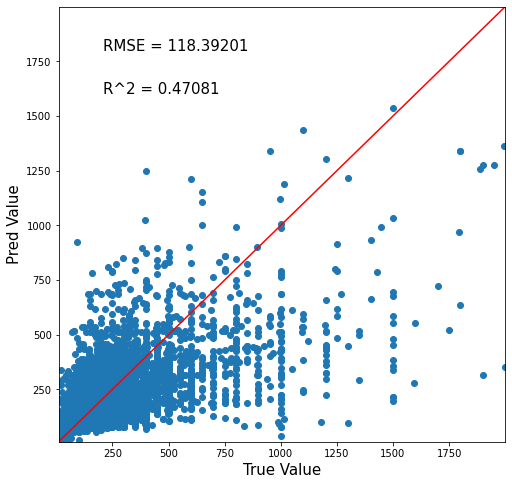

In [141]:
True_Pred_map(pred_df)

In [142]:
RMSE_list = []
count = []
for i in range(1, 15):
    params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth' : i}
    
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10000,
                valid_sets=lgb_eval,
                early_stopping_rounds=100,
                verbose_eval=50)
    
    predicted = gbm.predict(X_test)
    pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
    pred_df.columns = ['true', 'pred']
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    RMSE_list.append(RMSE)
    count.append(i)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 127.705
[100]	valid_0's rmse: 124.634
[150]	valid_0's rmse: 123.88
[200]	valid_0's rmse: 123.617
[250]	valid_0's rmse: 123.448
[300]	valid_0's rmse: 123.318
[350]	valid_0's rmse: 123.219
[400]	valid_0's rmse: 123.153
[450]	valid_0's rmse: 123.1
[500]	valid_0's rmse: 123.076
[550]	valid_0's rmse: 123.048
[600]	valid_0's rmse: 123.033
[650]	valid_0's rmse: 123.011
[700]	valid_0's rmse: 122.996
[750]	valid_0's rmse: 122.987
[800]	valid_0's rmse: 122.979
[850]	valid_0's rmse: 122.979
[900]	valid_0's rmse: 122.976
[950]	valid_0's rmse: 122.971
[1000]	valid_0's rmse: 122.974
[1050]	valid_0's rmse: 122.975
Early stopping, best iteration is:
[963]	valid_0's rmse: 122.969
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 120.762
[100]	valid_0's rmse: 119.332
[150]	valid_0's rmse: 119.066
[200]	valid_0's rmse: 119.094
[250]	valid_0's rmse: 119.113
Early stopping, best iteration i

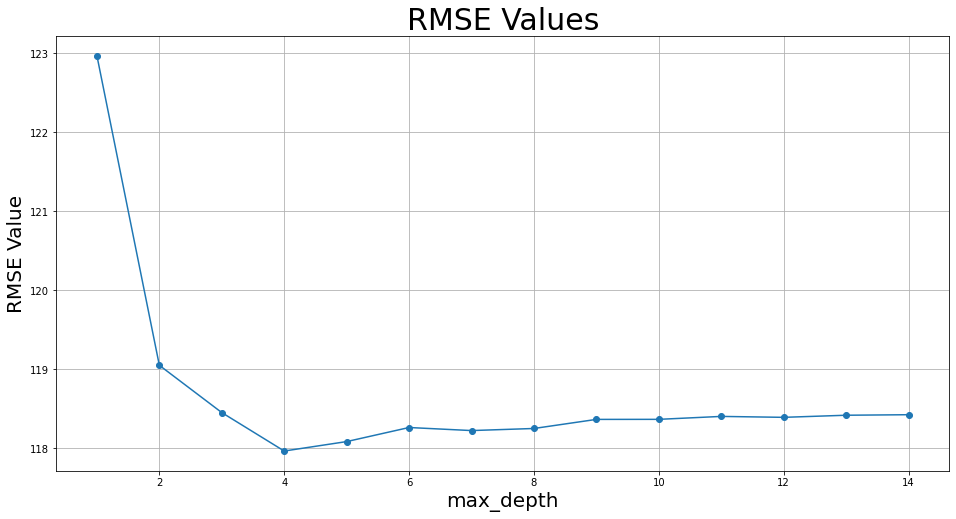

In [143]:
plt.figure(figsize=(16,8))
plt.plot(count, RMSE_list, marker="o")
plt.title("RMSE Values", fontsize=30)
plt.xlabel("max_depth", fontsize=20)
plt.ylabel("RMSE Value", fontsize=20)
plt.grid(True)

In [144]:
params = {'metric': 'rmse',
          'max_depth' : 4}

In [145]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=10000,
                early_stopping_rounds=100,
                verbose_eval=50)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 118.143
[100]	valid_0's rmse: 118.093
[150]	valid_0's rmse: 117.981
[200]	valid_0's rmse: 118.033
[250]	valid_0's rmse: 118.107
Early stopping, best iteration is:
[151]	valid_0's rmse: 117.966


testデータを扱っていく

In [146]:
mydata = pd.read_csv("test.csv")

In [147]:
def change_tf(x):
    if x=='t':
        return 1
    elif x=='f':
        return 0

mydata['cleaning_fee'] = mydata['cleaning_fee'].apply(change_tf)

In [148]:
select_columns =['accommodates','room_type','bed_type','bathrooms','bedrooms','beds','review_scores_rating','number_of_reviews','cleaning_fee']
dummy_data2 = pd.get_dummies(mydata[select_columns], drop_first=True)

In [149]:
y_pred_Unknown = gbm.predict(dummy_data2)

In [152]:
y_pred_Unknown

array([232.70389554, 154.88139779, 129.21268566, ..., 308.95620985,
       143.3494907 ,  47.13177881])

In [150]:
mydata['ab']= y_pred_Unknown

In [153]:
mydata[['id', 'ab']].to_csv('./submit_2021_2.csv', header=False, index=False)